In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [23]:
import os
print(os.getcwd())


C:\Users\Siddaraju


In [30]:
df = pd.read_csv(r"C:\Users\Siddaraju\Downloads\Rossmann Stores Data.csv") 
print(df.head())


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


C:\Users\Siddaraju\AppData\Local\Temp\ipykernel_5016\3440449839.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Siddaraju\Downloads\Rossmann Stores Data.csv")  # Example: Rossmann dataset


In [51]:
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
features = ['Store', 'DayOfWeek', 'Promo', 'Year', 'Month', 'Day']
X = df[features]
y = df['Sales']


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 3209.54
R² Score: 0.30


In [ ]:
import matplotlib.pyplot as plt

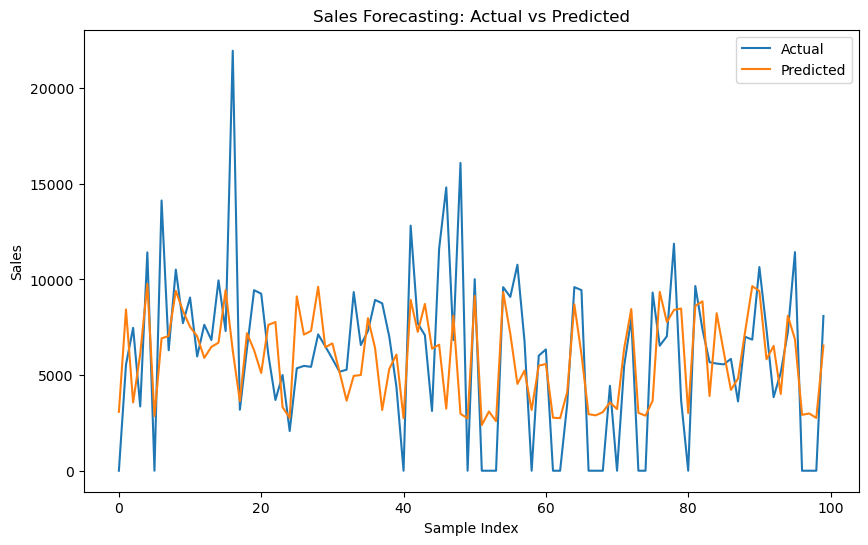

In [43]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("Sales Forecasting: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[df['Store'] == 1]
df = df[df['Sales'] > 0]
data = df[['Date', 'Sales']].copy()
data.set_index('Date', inplace=True)
scaler = MinMaxScaler()
data['Sales'] = scaler.fit_transform(data[['Sales']])

In [58]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
seq_length = 30
X, y = create_sequences(data['Sales'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [60]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [62]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Siddaraju\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.1256 - val_loss: 0.0492
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0487 - val_loss: 0.0183
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0225 - val_loss: 0.0132
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0187 - val_loss: 0.0136
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0167 - val_loss: 0.0131
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0173 - val_loss: 0.0131
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0181 - val_loss: 0.0128
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0181 - val_loss: 0.0132
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0161 - val_loss: 0.0126
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0161 - val_loss: 0.0127


In [64]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


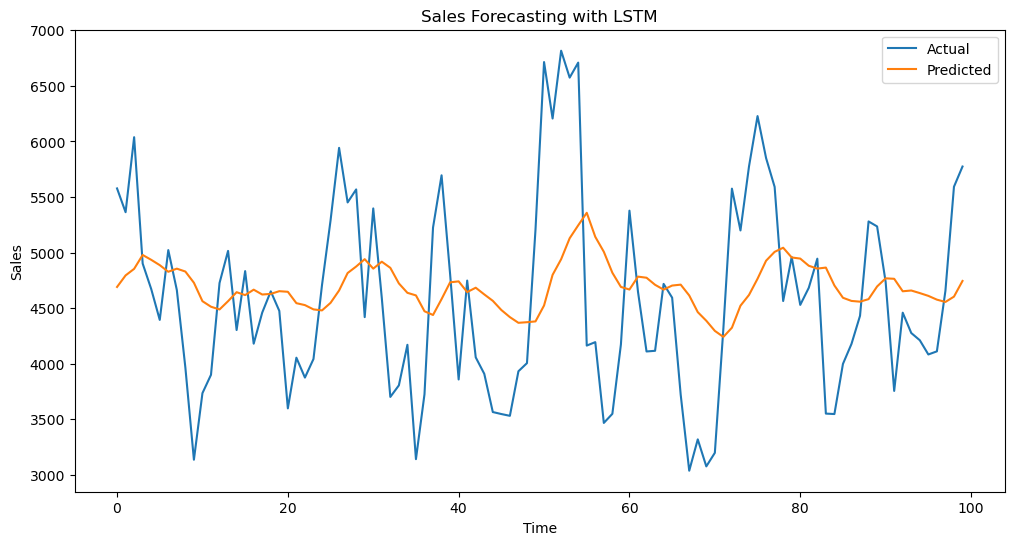

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:100], label='Actual')
plt.plot(y_pred_inv[:100], label='Predicted')
plt.title('Sales Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()